In [2]:
#  Step 1: Load & Inspect the Dataset
import pandas as pd

# Load dataset
df = pd.read_csv("C:/Users/dutta/Desktop/mall customer segmentation kmeans/data/Mall_Customers.csv")

# Initial shape
print("Initial Shape:", df.shape)

# Check for duplicates
print("Duplicate Rows:", df.duplicated().sum())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Display first few rows
df.head()


Initial Shape: (200, 5)
Duplicate Rows: 0

Missing Values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


✅ Cleaned dataset saved as mall_cleaned.csv


C:\Users\dutta\AppData\Local\Temp\ipykernel_14284\1279626753.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='Gender', palette="Set2")


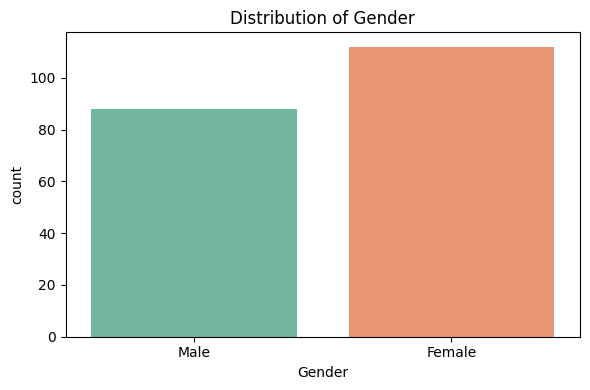

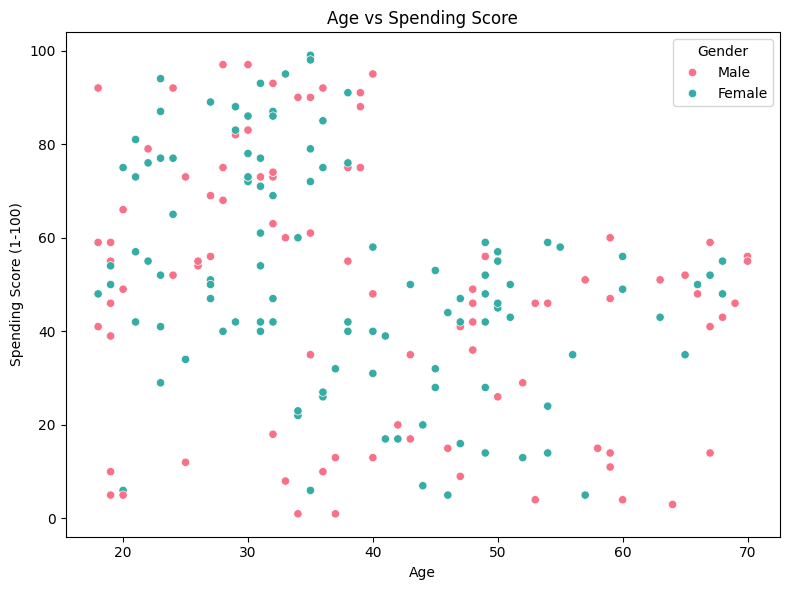

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop CustomerID (not useful for clustering)
df_cleaned = df.drop("CustomerID", axis=1)

# Save cleaned version
df_cleaned.to_csv("C:/Users/dutta/Desktop/mall customer segmentation kmeans/data/mall_cleaned.csv", index=False)
print(" Cleaned dataset saved as mall_cleaned.csv")

#  Visual EDA 1: Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df_cleaned, x='Gender', palette="Set2")
plt.title("Distribution of Gender")
plt.tight_layout()
plt.savefig("C:/Users/dutta/Desktop/mall customer segmentation kmeans/images/gender_distribution.png")
plt.show()

#  Visual EDA 2: Age vs Spending Score
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_cleaned, x="Age", y="Spending Score (1-100)", hue="Gender", palette="husl")
plt.title("Age vs Spending Score")
plt.tight_layout()
plt.savefig("C:/Users/dutta/Desktop/mall customer segmentation kmeans/images/age_vs_spending.png")
plt.show()


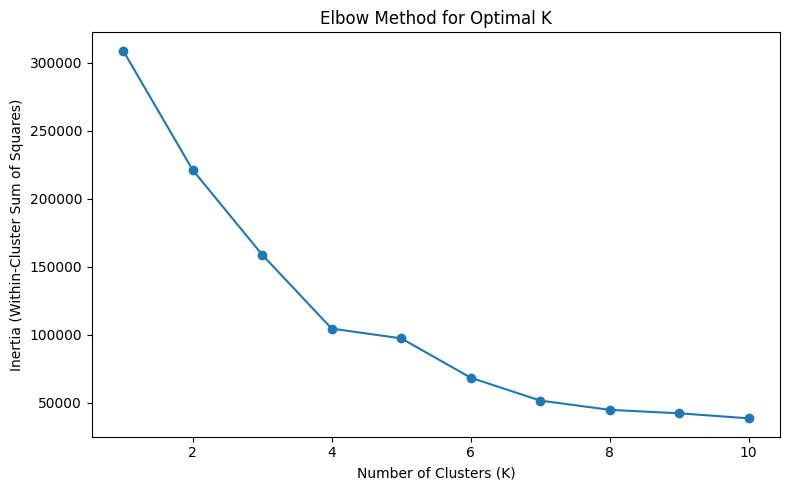

In [4]:
from sklearn.cluster import KMeans
import numpy as np

# Use only numerical features for clustering
X = df_cleaned[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.tight_layout()
plt.savefig("C:/Users/dutta/Desktop/mall customer segmentation kmeans/images/elbow_method.png")
plt.show()


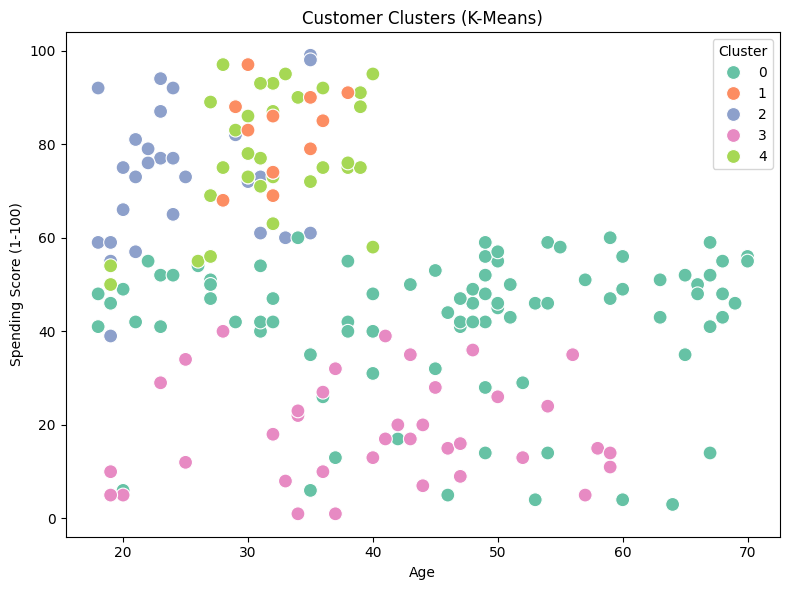

In [5]:
# Apply KMeans with optimal K (you can change it based on elbow curve)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(X)

# Plot clusters using Age vs Spending Score
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned, x='Age', y='Spending Score (1-100)', hue='Cluster', palette='Set2', s=100)
plt.title("Customer Clusters (K-Means)")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.tight_layout()
plt.savefig("C:/Users/dutta/Desktop/mall customer segmentation kmeans/images/kmeans_clusters.png")
plt.show()


In [6]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
sil_score = silhouette_score(X, df_cleaned['Cluster'])
print(f"Silhouette Score for K={optimal_k}: {sil_score:.4f}")


Silhouette Score for K=5: 0.3576
